[개념정리]
=================
성능 평가 지표 (evaluation metric)
- 회귀 : 대부분 실제값과 예측값의 오차 평균값에 기반
- 분류 : 일반적으로는 실제 결과 데이터와 예측 결과 데이터가 얼마나 정확하고 오류가 적게 발생하는가에 기반함
  - 위 방법으로는 잘못된 평과 결과에 빠질 수도 있음

분류의 성능 평가 지표
- 정확도 (Accuracy)
- 오차행렬 (Confusion Matrix)
- 정밀도 (Precision)
- 재현율 (Recall)
- F1 스코어
- ROC AUC

분류 : 이진 분류와 멀티 분류로 나눌 수 있음
- 이진 분류 : 결정 클래스 값 종류의 유형에 따라 긍정/부정과 같은 2개의 결괏값만을 가짐
- 멀티 분류 : 여러 개의 결정 클래스 값을 가짐

정확도
- 실제 데이터에서 예측 데이터가 얼마나 같은지를 판단하는 지표
- 예측 결과가 동일한 데이터 건수 / 전체 예측 데이터 건수
- 이진 분류에서는 정확도 수치 하나만으로 성능 평가 x
- 불균형한 레이블 값 분포에서 ML 모델의 성늘을 판단할 경우, 정확도는 적합한 평가 지표가 아님 (예 : MNIST 데이터세트)   -> 오차행렬로 문제 보완 가능 !

오차 행렬 (confusion matrix)
- 이진 분류의 예측 오류가 얼마인지와 더불어 어떠한 유형의 예측 오류가 발생하고 있는지를 함께 나타내는 지표

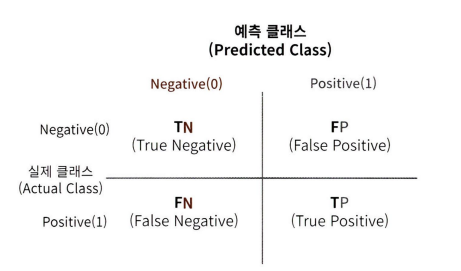

- 앞 문자의 True/False : 예측값과 실제값이 같은지 틀린지를 의미
- 뒤 문자의 Negative/Positive : 예측 결과 값이 부정(0)/긍정(1) 의미
- 사이킷런의 confusion_matrix() 이용 -> ndarray 형태로 오차행렬 출력가능
- 정확도 = (TN + TP) / (TN + FP + FN + TP)

정밀도와 재현율
- 정밀도 = TP / (FP + TP)
- 재현율 = TP / (FN + TP)
- 정밀도와 재현율이 모두 높은 수치면 좋은 성능 평가

정밀도
- 예측을 Positive로 한 대상 중에 예측과 실제 값이 Positive로 일치한 데이터의 비율
- 양성 예측도라고도 불림
- FP를 낮추는 데 초점 맞춤
- 사이킷런에서 precision_score() 이용

재현율
- 실제 값이 Positive인 대상 중에 예측과 실제 값이 Positive로 일치한 데이터의 비율
- 민감도 또는 TPR 이라고도 불림
- FN을 낮추는 데 초점 맞춤
- 사이킷런에서 recall_score() 이용

정밀도/재현율 트레이드오프
- 정밀도와 재현율은 상호보완적인 평가 지표이기 때문에 어느 한쪽을 강제로 높이면 다른 하나의 수치는 떨어지기 쉬움
- 사이킷런에서의 predict_proba() 메서드
  - 개별 데이터별로 예측 확률을 반환함
  - 학습이 완료된 사이킷런 Classifier 객체에서 호출이 가능하며, 테스트 피처 데이터 세트를 파라미터로 입력해주면 테스트 피처 레코드의 개별 클래스 예측 확률을 반환함

분류 결정 임곗값이 낮아질수록 -> positive로 예측할 확률이 높아짐 + True 값 많아짐 -> 재현율 증가

사이킷런에서의 precision_recall_curve() : 임곗값 변화에 따른 평가 지표 값
- 인자로 실제 값 데이터 세트 , 레이블 값이 1일 때의 예측 확률 값 입력 
- 0.11~0.95의 임곗값을 담은 넘파이 ndarray와 이 임곗값에 해당하는 정밀도 및 재현율을 담은 넘파이 ndarray를 반환함

정밀도와 재현율의 맹점
- 양성 예측의 임곗값을 변경함에 따라 정밀도와 재현율의 수치가 변경됨
- 임곗값의 변경은 정밀도와 재현율의 수치를 상호보완할 수 잇는 수준에서 적용되어야 함

정밀도가 100%가 되는 법
- 확실한 기준이 되는 경우에만 positive으로 예측하고 나머지는 negative로 예측하기

재현율이 100%가 되는 법
- 모든 경우를 positive로 예측하기

F1 스코어
- 정밀도와 재현율을 결합한 지표
- 정밀도와 재현율이 어느 한 쪽으로 치우치지 않는 수치를 나타낼 때 상대적으로 높은 값을 가짐
- 사이킷런에서 f1_score() 이용
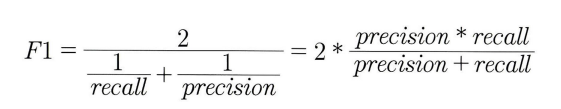

ROC곡선과 AUC

ROC곡선 : 수신자 판단 곡선
- 머신러닝의 이진 분류 모델의 예측 성능을 판단하는 중요한 평가 지표
- FPR이 변할 때, TPR(재현율)이 어떻게 변하는지를 나타내는 곡선
- FPR을 X축으로, TPR을 Y축으로 잡기
- 가운데 직선에 가까울수록 성능이 떨어짐 , 멀어질수록 성능 뛰어남
- FPR을 0으로 만드는 법 : 임곗값을 1로 설정
- FPR을 1로 만드는 법 : TN을 0으로 설정
- FPR = FP / (FP + TN) = 1 - TNR = 1 - 특이성
- 사이킷런에서 roc_curve() 이용

민감도와 특이성
민감도(TPR) : 실제값 Positive이 정확히 예측돼야 하는 수준을 나타냄
특이성(TNR) : 실제값 Negative이 정확히 예측돼야 하는 수준을 나타냄




In [ ]:
# 성별에 따라 생존자를 예측하는 단순한 알고리즘 
from sklearn.base import BaseEstimator    # 사이킷런은 BaseEstimator 상속받으면 Customized 형태의 Estimator 생성가능

class MyDummyClassifier(BaseEstimator):
    # fit() 메소드는 아무것도 학습하지 않음
    def fit(self, X , y=None):
        pass
    
    # predict() 메서드는 단순히 Sex feature가 1이면 0 , 그렇지 않으면 1로 예측함
    def predict(self, X):
        pred = np.zeros( ( X.shape[0], 1 ))
        for i in range (X.shape[0]) :
            if X['Sex'].iloc[i] == 1:
                pred[i] = 0
            else :
                pred[i] = 1
        
        return pred

In [ ]:
# 앞 장의 타이타닉 데이터 부분 복사해서 가져오기

# Null 처리 함수
def fillna(df):
  df['Age'].fillna(df['Age'].mean(), inplace=True)
  df['Cabin'].fillna('N', inplace=True)
  df['Embarked'].fillna('N', inplace=True)
  df['Fare'].fillna(0, inplace=True)
  return df

# 머신러닝 알고리즘에 불필요한 속성 제거
def drop_features(df):
  df.drop(['PassengerId','Name','Ticket'], axis=1, inplace=True)
  return df

# 레이블 인코딩 수행
from sklearn.preprocessing import LabelEncoder
def format_features(df):
  df['Cabin'] = df['Cabin'].str[:1]
  features = ['Cabin','Sex','Embarked']
  for feature in features:
    le = LabelEncoder()
    le = le.fit(df[feature])
    df[feature] = le.transform(df[feature])
  return df

# 앞에서 설정한 데이터 전처리 함수 호출
def transform_features(df):
  df = fillna(df)
  df = drop_features(df)
  df = format_features(df)
  return df

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import preprocessing

# 원본 데이터를 재로딩, 데이터 가공, 학습데이터/테스트 데이터 분할 
titanic_df =pd.read_csv('/content/sample_data/titanic_train.csv.csv')
y_titanic_df = titanic_df['Survived']
X_titanic_df= titanic_df.drop('Survived', axis=1)
X_titanic_df = transform_features(X_titanic_df)
X_train, X_test, y_train, y_test=train_test_split(X_titanic_df, y_titanic_df, test_size = 0.2, random_state=0)

# 위에서 생성한 MyDummyClassifier를 이용해 학습/예측/평가 수행 
myclf = MyDummyClassifier()
myclf.fit(X_train ,y_train)

mypredictions = myclf.predict(X_test)
print('Dummy Classifier의 정확도는: {0:.4f}'.format(accuracy_score(y_test , mypredictions)))
# 단순한 알고리즘으로 예측해도 데이터의 구성에 따라 정확도가 꽤나 높게 나올 수 있으니깐 신중하기

In [ ]:
# MNIST 데이터셋을 가공하여 불균형한 데이터셋에 대해 정확도를 평가 지표로 사용할 때 발생하는 문제 살펴보기 
# 0~9까지의 레이블 값 중에서 7인 것만 True(1), 나머지는 모두 False(0)로, 멀티레이블을 이진 분류로 바꿈
# 불균형한 데이터 세트로 변함
# 모든 데이터를 False, 즉 0으로 예측하는 classifier를 이용해 정확도 측정하면 90%에 가까운 높은 예측 정확도가 됨

from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator
from sklearn.metrics import accuracy_score

class MyFakeClassifier(BaseEstimator):
    def fit(self,X,y):
        pass
    
    # 입력값으로 들어오는 X 데이터셋의 크기만큼 모두 0값으로 만들어서 반환
    def predict(self,X):
        return np.zeros((len(X),1) , dtype = bool)

# 사이킷런의 내장 데이터 셋인 load_digits( )를 이용하여 MNIST 데이터 로딩
digits = load_digits()

# digits 번호가 7이면 True이고 이를 int 1로 변환, 7이 아니면 False이고 0으로 변환
y = (digits.target == 7).astype(int) 

X_train, X_test, y_train, y_test = train_test_split(digits.data, y, random_state = 11)

In [ ]:
# 불균형한 데이터로 생성한 y_test의 데이터 분포도를 확인 + MyFakeClassifier 이용해서 예측과 평가 수행 

# 불균형한 레이블 데이터 분포도 확인
print('레이블 테스트 세트 크기 :', y_test.shape)
print('테스트 세트 레이블 0 과 1의 분포도')
print(pd.Series(y_test).value_counts())

# Dummy Classifier로 학습/예측/정확도 평가
fakeclf = MyFakeClassifier()
fakeclf.fit(X_train, y_train)

fakepred=fakeclf.predict(X_test)
print('모든 예측을 0으로 하여도 정확도는 : {:.3f}'.format(accuracy_score(y_test ,fakepred)))

In [ ]:
# pg.152 : 오차 행렬

# 예측 결과 fakepred와 실제 결과인 y_test의 오차행렬

from sklearn.metrics import confusion_matrix    # 사이킷런의 confusion_matrix() 이용

confusion_matrix(y_test, fakepred)    # ndarray 형태

# TP / TN / FP / TN 값을 조합해서 정확도, 정밀도, 재현율 값 알 수 있음

In [ ]:
# pg.156 : 정밀도와 재현율
# 여러 평가를 한꺼번에 호출하는 get_clf_eval() 함수 만들기 + 타이타닉 데이터 이용해서 분류 수행

from sklearn.metrics import accuracy_score, precision_score , recall_score , confusion_matrix

def get_clf_eval(y_test , pred):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}'.format(accuracy , precision ,recall))

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression

# 원본 데이터를 재로딩, 데이터 가공, 학습 데이터/테스트 데이터 분할
titanic_df = pd.read_csv('/content/sample_data/titanic_train.csv.csv')
y_titanic_df = titanic_df['Survived']
X_titanic_df= titanic_df.drop('Survived', axis = 1)
X_titanic_df = transform_features(X_titanic_df)

X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df, test_size=0.20, random_state=11)

# 로지스틱 회귀모델
lr_clf = LogisticRegression()

# 훈련 + 예측
lr_clf.fit(X_train, y_train)
pred = lr_clf.predict(X_test)

# 성능 테스트
get_clf_eval(y_test, pred)    # 정밀도 > 재현율 로 출력됨을 알 수 있음

In [ ]:
# pg.159 : 정밀도/재현율 트레이드오프

pred_proba = lr_clf.predict_proba(X_test)
pred = lr_clf.predict(X_test)
print('pred_proba() 결과 Shape : {0}'.format(pred_proba.shape))
print('pred_proba array에서 앞 3개만 샘플로 추출 \n:', pred_proba[:3])

# 예측 확률 array와 예측 결괏값 array를 병합(concatenate)해 예측 확률과 결괏값을 한눈에 확인
pred_proba_result = np.concatenate([pred_proba, pred.reshape(-1,1)], axis=1)
print('두 개의 class 중에서 더 큰 확률을 클래스 값으로 예측 \n', pred_proba_result[:3])

In [ ]:
from sklearn.preprocessing import Binarizer

X = [[1,-1,2],
     [2,0,0],
     [0,1.1,1.2]]

# X의 개별 원소들이 threshold값보다 같거나 작으면 0을, 크면 1을 반환
binarizer = Binarizer(threshold=1.1)
print(binarizer.fit_transform(X))

In [ ]:
# Binarizer 이용해서 사이킷런 predict()의 의사 코드 만들어보기

from sklearn.preprocessing import Binarizer

# Binarizer의 threshold 설정값. 분류 결정 임곗값임
custom_threshold = 0.5

# predict_proba() 반환값의 두 번째 칼럼, 즉 Positive 클래스 칼럼 하나만 추출해 Binarizer를 적용
pred_proba_1 = pred_proba[:,1].reshape(-1,1)

binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_1)
custom_predict = binarizer.transform(pred_proba_1)

get_clf_eval(y_test, custom_predict)
# 로지스틱 회귀 classifier 객체에서 호출된 predict()로 계산된 지표 값과 정확히 같음

In [ ]:
# 임계값을 낮추면...

# Binarizer의 threshold 설정값을 0.4로 설정. 즉 분류 결정 임곗값을 0.5에서 0.4로 낮춤
custom_threshold = 0.4
pred_proba_1 = pred_proba[:,1].reshape(-1,1)
binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_1)
custom_predict = binarizer.transform(pred_proba_1)

get_clf_eval(y_test, custom_predict)    # 임계값 낮추면 -> 재현율 값 올라가고, 정밀도 떨어짐

# 분류 결정 임곗값이 낮아질수록 -> positive로 예측할 확률이 높아짐 + True 값 많아짐 -> 재현율 증가

In [ ]:
# 임계값을 높이면...

# 0.4부터 0.6까지 0.05씩 증가시키며 평가 지표 조사

# 테스트를 수행할 모든 임곗값을 리스트 객체로 저장
thresholds = [0.4,0.45,0.50,0.55,0.60]

def get_eval_by_threshold(y_test, pred_proba_c1, thresholds):
  # thresholds list객체 내의 값을 차례로 iteration하면서 Evaluation 수행
  for custom_threshold in thresholds:
    binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_c1)
    custom_predict = binarizer.transform(pred_proba_c1)
    print('임곗값:', custom_threshold)
    get_clf_eval(y_test, custom_predict)
    print(' ')

get_eval_by_threshold(y_test, pred_proba[:,1].reshape(-1,1), thresholds)

- 임곗값이 0.45일 경우, 디폴트 0.5인 경우와 비교해서 정확도는 동일 + 정밀도는 약간 떨어짐 + 재현율 올라감
- 재현율 향상시키면서 다른 수치를 어느 정도 감소하는 희생을 해야 한다면 임곗값 0.45가 가장 적당함

In [ ]:
# pg.164
# 사이킷런에서의 precision_recall_curve() : 임곗값 변화에 따른 평가 지표 값
#                                         : 인자로 실제 값 데이터 세트 , 레이블 값이 1일 때의 예측 확률 값 입력 
# 0.11~0.95의 임곗값을 담은 넘파이 ndarray와 이 임곗값에 해당하는 정밀도 및 재현율을 담은 넘파이 ndarray를 반환함

# precision_recall_curve() 이용해서 타이타닉 예측 모델의 임곗값별 정밀도 + 재현율 구하기
from sklearn.metrics import precision_recall_curve

# 레이블 값이 1일 때의 예측 확률을 추출
pred_proba_class1 = lr_clf.predict_proba(X_test)[:,1]    # 두 번째 칼럼 값에 해당하는 데이터 세트

# 실제값 데이터 세트와 레이블 값이 1일 때의 예측 확률을 precision_recall_curve 인자로 입력
precisions, recalls, thresholds = precision_recall_curve(y_test,pred_proba_class1)
print('반환된 분류 결정 임곗값 배열의 Shape:', thresholds.shape)

# 반환된 임곗값 배열 로우가 147건이므로(너무 많은 값 단위의 반환되는 임곗값) 샘플로 10건만 추출하되,
# 임곗값을 15 Step으로 추출
thr_index = np.arange(0, thresholds.shape[0],15)
print('샘플 추출을 위한 임곗값 배열의 index 10개:',thr_index)
print('샘플용 10개의 임곗값: ',np.round(thresholds[thr_index],2))

# 15 step 단위로 추출된 임곗값에 따른 정밀도와 재현율 값
print('샘플 임곗값별 정밀도: ',np.round(precisions[thr_index],3))
print('샘플 임곗값별 재현율: ',np.round(recalls[thr_index],3))

- 임곗값이 증가할수록 정밀도 값은 동시에 높아지나 재현율 값은 낮아짐을 알 수 있음

In [ ]:
# 정밀도와 재현율의 임계값에 따른 값 변화를 이용해서 곡선 형태의 그래프로 시각화해보기

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

def precision_recall_curve_plot(y_test, pred_proba_c1):
  # threshold ndarray와 이 threshold에 따른 정밀도, 재현율 ndarray 추출
  precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_c1)

  # X축을 threshold값으로, Y축은 정밀도, 재현율 값으로 각각 Plot 수행. 정밀도는 점선으로 . 재현율은 실선으로
  plt.figure(figsize=(8,6))
  threshold_boundary = thresholds.shape[0]
  plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
  plt.plot(thresholds, recalls[0:threshold_boundary],label='recall')

  # threshold 값 X축의 Scale을 0.1 단위로 변경
  start, end = plt.xlim()
  plt.xticks(np.round(np.arange(start,end,0.1),2))

  # x축, y축 label과 legend, 그리고 grid 설정
  plt.xlabel('Threshold value'); plt.ylabel('Precision and Recall value')
  plt.legend(); plt.grid()
  plt.show()

precision_recall_curve_plot(y_test, lr_clf.predict_proba(X_test)[:,1])

- 임곗값이 낮을수록 많은 수의 양성 예측으로 인해 재현율 값이 극도로 높아지고 정밀도 값이 극도로 낮아짐
- 임곗값을 계속 증가시킬수록 재현율 값이 낮아지고 정밀도 값이 높아지는 반대의 양상이 됨

pg.167 : 정밀도와 재현율의 맹점
- 양성 예측의 임곗값을 변경함에 따라 정밀도와 재현율의 수치가 변경됨
- 임곗값의 변경은 정밀도와 재현율의 수치를 상호보완할 수 잇는 수준에서 적용되어야 함

정밀도가 100%가 되는 법
- 확실한 기준이 되는 경우에만 positive으로 예측하고 나머지는 negative로 예측하기

재현율이 100%가 되는 법
- 모든 경우를 positive로 예측하기

In [ ]:
# pg.168 : F1 스코어
# 사이킷런에서 f1_score() 이용

from sklearn.metrics import f1_score
f1 = f1_score(y_test, pred)
print('F1 스코어: {0:.4f}'.format(f1))

In [ ]:
# 임곗값 0.4~0.6별로 정확도, 정밀도, 재현율, F1 스코어 알아보기

# 위에서 작성한 get_clf_eval() 함수에 F1스코어 구하는 로직 추가하기
def get_clf_eval(y_test, pred):
  confusion = confusion_matrix(y_test,pred)
  accuracy = accuracy_score(y_test, pred)
  precision = precision_score(y_test, pred)
  recall = recall_score(y_test, pred)

  # F1 스코어 추가
  f1 = f1_score(y_test, pred)
  
  print('오차 행렬')
  print(confusion)
  
  # f1 score print 추가
  print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1:{3:.4f}'.format(accuracy, precision, recall, f1))

thresholds = [0.4, 0.45, 0.50, 0.55, 0.60]
pred_proba = lr_clf.predict_proba(X_test)
get_eval_by_threshold(y_test, pred_proba[:,1].reshape(-1,1), thresholds)

F1 스코어는 임곗값이 0.6일 때 가장 좋은 값을 보여줌

In [ ]:
# pg.169 : ROC 곡선과 AUC
# 사이킷런에서 roc_curve() 이용해서 ROC 곡선 구하기

from sklearn.metrics import roc_curve

# 레이블 값이 1일 때의 예측 확률을 추출
pred_proba_class1 = lr_clf.predict_proba(X_test)[:,1]

fprs, tprs, thresholds = roc_curve(y_test, pred_proba_class1)
# 반환된 임곗값 배열 로우가 47건이므로 샘플로 10건만 추출하되, 임곗값을 5 step으로 추출
# thresholds[0]은 max(예측확률)+1로 임의 설정됨. 이를 제외하기 위해 np.arange는 1부터 시작
thr_index = np.arange(1, thresholds.shape[0], 5)
print('샘플 추출을 위한 임곗값 배열의 index 10개:', thr_index)
print('샘플용 10개의 임곗값: ', np.round(thresholds[thr_index],2))

# 5 step 단위로 추출된 임곗값에 따른 FPR, TPR 값
print('샘플 임곗값별 FPR: ', np.round(fprs[thr_index], 3))
print('샘플 임곗값별 TPR: ', np.round(tprs[thr_index], 3))

- 임곗값이 1에 가까운 값에서 점점 작아지면서 FPR 값이 점점 커짐
- FPR이 조금씩 커질 때 TPR은 가파르게 커짐

In [ ]:
# FPR 변화에 따른 TPR의 변화를 ROC 곡선으로 시각화하기

def roc_curve_plot(y_test, pred_proba_c1):
  # 임곗값에 따른 FPR, TPR 값을 반환받음
  fprs, tprs, thresholds = roc_curve(y_test, pred_proba_c1)
  # ROC 곡선을 그래프 곡선으로 그림
  plt.plot(fprs, tprs, label='ROC')
  # 가운데 대각선 직선을 그림.
  plt.plot([0,1],[0,1],'k-',label='Random')

  # FPR X축의 Scale을 0.1 단위로 변경, X, Y축 명 설정 등
  start, end = plt.xlim()
  plt.xticks(np.round(np.arange(start,end,0.1),2))
  plt.xlim(0,1);plt.ylim(0,1)
  plt.xlabel('FPR( 1 - Sensitivity )'); plt.ylabel('TPR( Recall )')
  plt.legend()

roc_curve_plot(y_test, pred_proba[:,1])

- AUC 값은 ROC 곡선 밑의 면적을 구한 것으로서 1에 가까울수록 좋은 수치임

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score
from sklearn.metrics import recall_score, f1_score, roc_auc_score
import numpy as np

print(confusion_matrix(y_target, preds))
print("정확도:",np.round(accuracy_score(y_target, preds),4))
print("정밀도:",np.round(precision_score(y_target, preds),4))
print("재현율:",np.round(recall_score(y_target, preds),4))

In [ ]:
# 정확도, 정밀도, 재현율, F1 스코어, ROC AUC 값까지 출력
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score
from sklearn.metrics import recall_score, f1_score, roc_auc_score

def get_clf_eval(y_test, pred=None, pred_proba=None):
  confusion = confusion_matrix(y_test, pred)
  accuracy = accuracy_score(y_test, pred)
  precision = precision_score(y_test, pred)
  recall = recall_score(y_test, pred)
  f1 = f1_score(y_test, pred)
  # ROC-AUC 추가
  roc_auc = roc_auc_score(y_test, pred_proba)
  print('오차 행렬')
  print(confusion)
  # ROC-AUC print 추가
  print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f},\
  F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))